In [4]:
import pandas as pd

# Use raw string (r"...") to avoid issues with backslashes
file_path = r"D:\DocumentD\GithubProject_Personal\CollectionsPythonDataScienceProjects\Data\AespaTourData\aespatourdatawinterseason.csv"

# Load the CSV
df = pd.read_csv(file_path)

# Show the first few rows
df.head()


,Month,Country,Male_Tickets,Female_Tickets,Male_Revenue,Female_Revenue,Total_Revenue
0,2024-11,South Korea,12000,18000,"1,440,000","2,160,000","3,600,000"
1,2024-11,Japan,9500,15500,"1,140,000","1,860,000","3,000,000"
2,2024-11,USA,8000,12000,"960,000","1,440,000","2,400,000"
3,2024-11,UK,7000,10000,"840,000","1,200,000","2,040,000"
4,2024-11,Thailand,8500,11500,"1,020,000","1,380,000","2,400,000"


In [5]:
print(df)

      Month      Country  Male_Tickets  Female_Tickets Male_Revenue  \
0   2024-11  South Korea         12000           18000    1,440,000   
1   2024-11        Japan          9500           15500    1,140,000   
2   2024-11          USA          8000           12000      960,000   
3   2024-11           UK          7000           10000      840,000   
4   2024-11     Thailand          8500           11500    1,020,000   
5   2024-12  South Korea         15000           20000    1,800,000   
6   2024-12        Japan         11000           16000    1,320,000   
7   2024-12          USA         10000           14000    1,200,000   
8   2024-12           UK          7500           11000      900,000   
9   2024-12     Thailand          9000           13000    1,080,000   
10  2025-01  South Korea         13000           19000    1,560,000   
11  2025-01        Japan         10000           15000    1,200,000   
12  2025-01          USA          9500           12500    1,140,000   
13  20

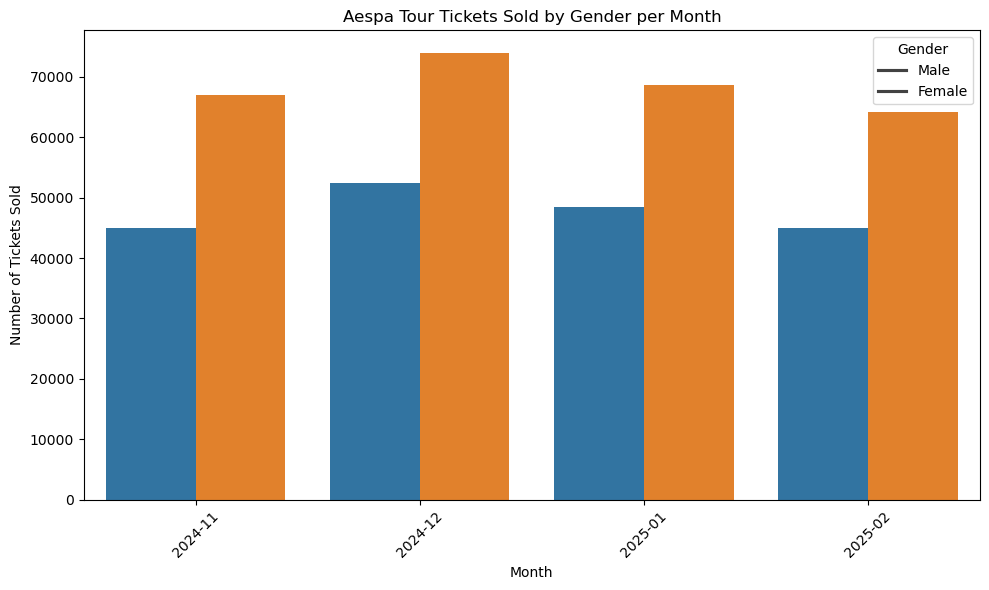

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate total male and female tickets per month
monthly_data = df.groupby('Month')[['Male_Tickets', 'Female_Tickets']].sum().reset_index()

# Set the plot size
plt.figure(figsize=(10,6))

# Create grouped barplot
sns.barplot(data=monthly_data.melt(id_vars='Month', value_vars=['Male_Tickets', 'Female_Tickets']),
            x='Month', y='value', hue='variable')

plt.title('Aespa Tour Tickets Sold by Gender per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tickets Sold')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


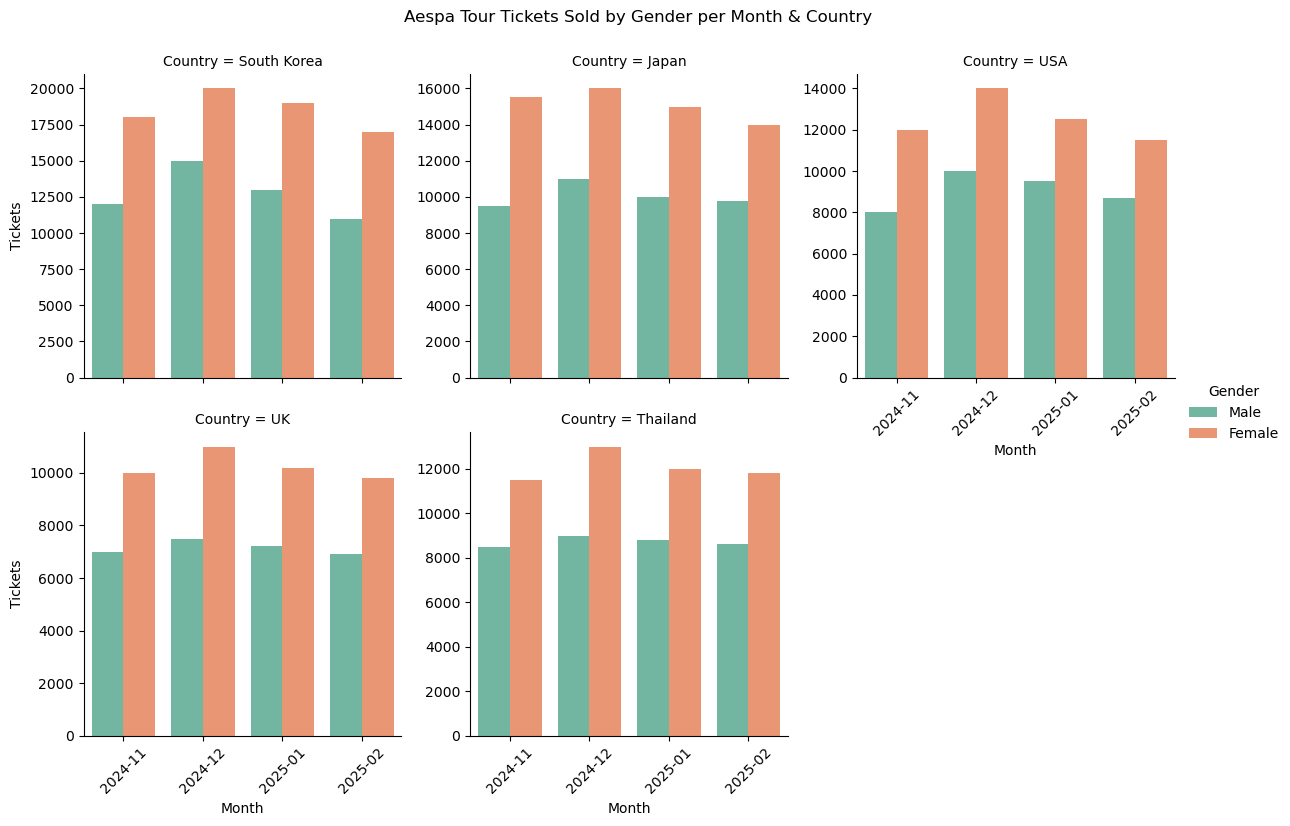

In [10]:

# Melt the data for seaborn plotting
df_melted = df.melt(id_vars=['Month', 'Country'], 
                    value_vars=['Male_Tickets', 'Female_Tickets'], 
                    var_name='Gender', value_name='Tickets')

# Replace '_Tickets' with '' for nicer labels
df_melted['Gender'] = df_melted['Gender'].str.replace('_Tickets', '')

# Set up FacetGrid to create one plot per country
g = sns.FacetGrid(df_melted, col="Country", col_wrap=3, height=4, sharey=False)

# Plot grouped bar charts by month and gender with updated errorbar parameter
g.map_dataframe(sns.barplot, x='Month', y='Tickets', hue='Gender', palette='Set2', errorbar=None)

# Add legend, rotate x labels
g.add_legend(title='Gender')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Aespa Tour Tickets Sold by Gender per Month & Country')
plt.show()
